In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

datapath = '../../Data/Processed/titanic.parquet'
dataidade = '../../Data/Modeling/idade.csv'
save_file = '../../Data/Processed/titanic_model.parquet'

# Leitura dos Dados 

In [2]:
df = pd.read_parquet(datapath)

print('shape:', df.shape)
print('columns:', df.columns)

shape: (1309, 10)
columns: Index(['Sobreviveu', 'Classe', 'Nome', 'Sexo', 'Idade', 'IrmaosCasal',
       'PaisFilhos', 'Bilhete', 'Tarifa', 'PortoEmbarque'],
      dtype='object')


# Analisando o Dataframe

In [3]:
df.describe()

,Sobreviveu,Classe,Idade,IrmaosCasal,PaisFilhos,Tarifa
count,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1309.000000
mean,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.486592,0.837836,14.413493,1.041658,0.865560,51.738879
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


Observando essa descrição das variáveis númericas podemos concluir que:

* Pelo menos 75% dos passageiros não viajaram com os ***PaisFilhos***
* Pelo menos 50% dos passageiros não viajaram com os ***IrmaosCasal***
* A ***Idade*** da pessoa mais velha no barco é muito distante dos 75% restantes.
* O valor da ***Tarifa*** mais alta difere muito dos 75% restantes.
* ***Sobreviveu*** é uma variável categórica com valores de 0 e 1.

In [4]:
df.describe(include=['O'])


,Nome,Sexo,Bilhete,PortoEmbarque
count,1309,1309,1309,1309
unique,1307,2,929,3
top,"Kelly, Mr. James",Homem,CA. 2343,S
freq,2,843,11,916


Observando essa descrição das variáveis categóricas podemos concluir que:

* A coluna ***Nome*** possui somente termos únicos.
* A coluna ***Sexo*** possui dois valores possíveis sendo *Homem* o que mais frequente.
* A coluna ***Bilhete*** tem uma taxa alta de ocorrências duplicadas.
* A coluna ***Cabine*** possui muitos valores faltantes.
* ***PortoEmbarque*** possui dois valores possíveis sendo *S* o que mais frequente.

# Agrupando os dados

* ## Classe x Sobreviência

In [5]:
df[['Classe', 'Sobreviveu']].groupby(['Classe']).mean().sort_values(by='Sobreviveu', ascending=False)

,Sobreviveu
Classe,
1,0.629630
2,0.472826
3,0.242363


Podemos concluir que quanto mais alta a Classe do passageiro, mais propenso a sobreviver ele está.

* ## Sexo x Sobreviência

In [6]:
df[['Sexo', 'Sobreviveu']].groupby(['Sexo']).mean().sort_values(by='Sobreviveu', ascending=False)

,Sobreviveu
Sexo,
Mulher,0.742038
Homem,0.188908


Como tinhamos visto anteriormente na análise para predição da idade, as mulheres tem mais propensão a sobreviver que os homens.  
Se criassemos um modelo verificando somente por Sexo, esse modelo já acertaria 74% das vezes, se Sexo = Mulher.

* ## IrmaosCasal x Sobreviência

In [7]:
df[['IrmaosCasal', 'Sobreviveu']].groupby(['IrmaosCasal']).mean().sort_values(by='Sobreviveu', ascending=False)

,Sobreviveu
IrmaosCasal,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


Quem viajava com no máximo 2 IrmaosCasal tem uma chance superior de sobreviência do que quem viajava com mais. Pessoas que viajavam com 5 ou mais, não tem nenhuma propensão a sobreviver.

* ## PaisFilhos x Sobreviência

In [8]:
df[['PaisFilhos', 'Sobreviveu']].groupby(['PaisFilhos']).mean().sort_values(by='Sobreviveu', ascending=False)

,Sobreviveu
PaisFilhos,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000
9,NaN


Assim como quem viajava com irmãos ou em casal, quanto mais elevado o número de filhos, menor a chance de sobreivência.  
Podemos verificar se existe correlação entre essas duas últimas variáveis para podermos melhor nosso modelo.

In [9]:
df.corr()

,Sobreviveu,Classe,Idade,IrmaosCasal,PaisFilhos,Tarifa
Sobreviveu,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Classe,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558477
Idade,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178229
IrmaosCasal,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160224
PaisFilhos,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221522
Tarifa,0.257307,-0.558477,0.178229,0.160224,0.221522,1.000000


# Visualização de Dados
Observar os dados de forma visual para averiguar as suposições feitas até agora

### Gráfico de Barras e Pizza de Sobreviventes

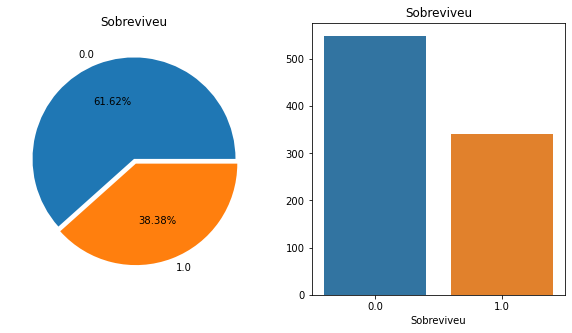

In [10]:
f,ax=plt.subplots(1,2,figsize=(10,5))

df['Sobreviveu'].value_counts().plot.pie(explode=[0,0.05],autopct='%0.2f%%',ax=ax[0])

ax[0].set_title('Sobreviveu')
ax[0].set_ylabel('')

sns.countplot('Sobreviveu',data=df,ax=ax[1])

ax[1].set_title('Sobreviveu')
ax[1].set_ylabel('');

## Sobrevivência Por Sexo

In [11]:
pd.crosstab(df['Sexo'], df['Sobreviveu'])

Sobreviveu,0.0,1.0
Sexo,,
Homem,468,109
Mulher,81,233


### Gráfico de Barras de Sobreviventes por Sexo

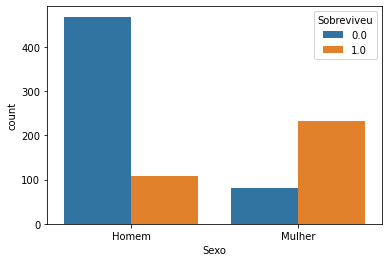

In [12]:
sns.countplot('Sexo',hue='Sobreviveu',data=df);

<a name="histidsob"></a>

### Histograma de Idade x Sobreviveu

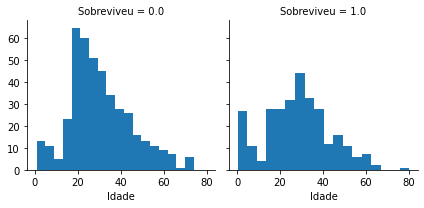

In [13]:
g = sns.FacetGrid(df, col='Sobreviveu')
g.map(plt.hist, 'Idade', bins=18);

* Crianças sobreviveram mais
* Passageiro mais idoso sobreviveu
* A maioria dos passageiros estão na faixa de 18-40 anos (E a maioria não sobreviveu)

<a name="histclassidsob"></a>

### Histograma de Idade x Classe x Sobreviveu

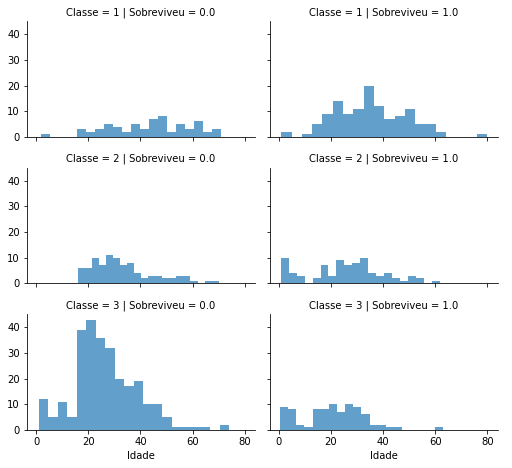

In [14]:
grid = sns.FacetGrid(df, col='Sobreviveu', row='Classe', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Idade', alpha=0.7, bins=20)
grid.add_legend();

Como vimos anteriormente, podemos verificar graficamente que os passageiros da Primeira Classe sobreviveram mais do que os das outras classes.

<a name="chancesporto"></a>

### Chances de Sobrevivência por Porto de Embarque

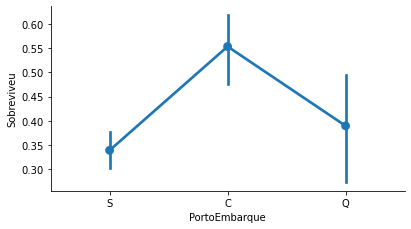

In [15]:
sns.catplot('PortoEmbarque','Sobreviveu',data=df, kind='point')
fig=plt.gcf()
fig.set_size_inches(6,3)

* Vemos uma maior chance de sobrevivência nos passageiros que embarcaram no Porto C que nos demais.
* O porto S foi o que teve uma taxa de sobreviência menor

<a name="pointplotembarque"></a>

### Embarque x Classe x Sobreviveu

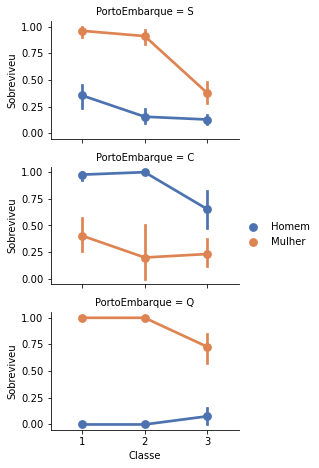

In [16]:
grid = sns.FacetGrid(df, row='PortoEmbarque', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Classe', 'Sobreviveu', 'Sexo', palette='deep')
grid.add_legend();

* As mulheres que embarcaram no porto S e Q sobreviveram mais que as mulheres do porto C
* Os homens que embarcaram no porto C sobriveram mais que os homens dos portos S e Q.
* O porto Q foi onde tiveram menos sobreviventes homens e mais sobreviventes mulheres

### Agrupar mulheres por sobrevivência

In [17]:
df.loc[df['Sexo']=='Mulher'].groupby('Sobreviveu').mean()

,Classe,Idade,IrmaosCasal,PaisFilhos,Tarifa
Sobreviveu,,,,,
0.0,2.851852,25.046875,1.209877,1.037037,23.024385
1.0,1.918455,28.847716,0.515021,0.515021,51.938573


### Agrupar homens por sobrevivência

In [18]:
df.loc[df['Sexo']=='Homem'].groupby('Sobreviveu').mean()

,Classe,Idade,IrmaosCasal,PaisFilhos,Tarifa
Sobreviveu,,,,,
0.0,2.476496,31.618056,0.440171,0.207265,21.960993
1.0,2.018349,27.276022,0.385321,0.357798,40.821484


<a name="graficobarras"></a>

### Gráfico de Barras Sexo x Tarifa por Sexo

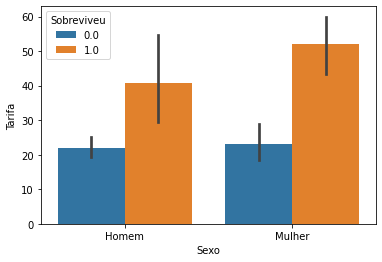

In [19]:
sns.barplot('Sexo','Tarifa',hue='Sobreviveu',data=df);

* É possível verificar que os passageiros com tarifas abaixo de 20, tiveram menos chance de sobrevivencia que os passageiros com tarifas mais elevada.

<a name="graficobarrassex"></a>

### Gráfico de Barras Sexo x Tarifa x Embarque x Sobreviveu

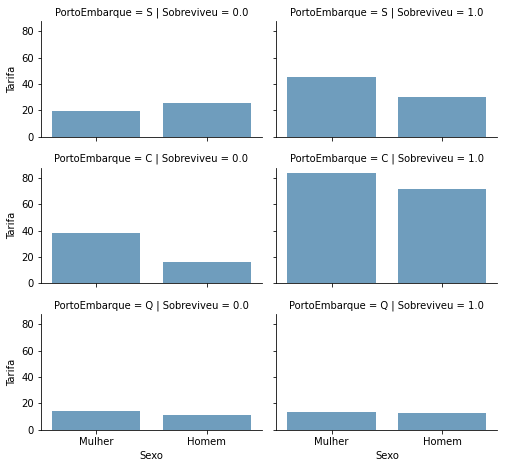

In [20]:
grid = sns.FacetGrid(df, row='PortoEmbarque', col='Sobreviveu', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sexo', 'Tarifa', alpha=0.7, ci=None)
grid.add_legend();

<a name="pizza"></a>

### Crosstab de Sobrevivência por Classe

In [21]:
pd.crosstab(df['Sobreviveu'],df['Classe'],margins=True).style.background_gradient(cmap='OrRd')

Classe,1,2,3,All
Sobreviveu,,,,
0.0,80,97,372,549
1.0,136,87,119,342
All,216,184,491,891


<a name="vimissing"></a>

* A maioria dos mortos na tragédia eram da Terceira Classe

## Visualizando Dados Faltando

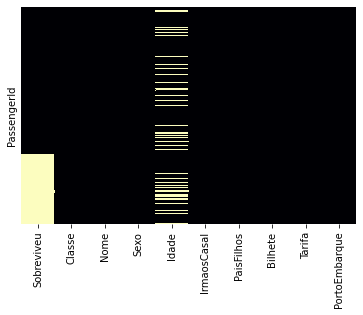

In [22]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='magma');

### Boxplot de Classe por Sexo

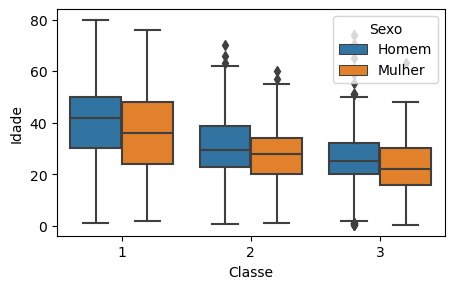

In [23]:
plt.figure(figsize=(5,3),dpi=100)
sns.boxplot(x='Classe', y='Idade', hue='Sexo', data=df);

Podemos verificar que a quanto mais alta a classe, a idade também acaba sendo mais elevada, sendo que os homens sempre são um pouco mais velhos que as mulheres.

<a name="engenharia"></a>

# Engenharia de Recursos

### Extrair Titulo do Nome

In [24]:
df['Titulo'] = df['Nome'].str.extract('([a-zA-Z]+)\.')

In [25]:
df['Titulo'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [26]:
pd.crosstab(df['Titulo'], df['Sexo'])

Sexo,Homem,Mulher
Titulo,,
Capt,1,0
Col,4,0
Countess,0,1
Don,1,0
Dona,0,1
Dr,7,1
Jonkheer,1,0
Lady,0,1
Major,2,0


In [27]:
df['Titulo'] = df['Titulo'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Outros')

df['Titulo'] = df['Titulo'].replace('Mlle', 'Miss')
df['Titulo'] = df['Titulo'].replace('Ms', 'Miss')
df['Titulo'] = df['Titulo'].replace('Mme', 'Mrs')

pd.crosstab(df['Titulo'], df['Sexo'])

Sexo,Homem,Mulher
Titulo,,
Master,61,0
Miss,0,264
Mr,757,0
Mrs,0,198
Outros,25,4


### Traduzir "Titulos"

In [28]:
traduzindo_titulos = {
    'Master': 'Menino',
    'Miss': 'Solteira',
    'Mr': 'Adulto',
    'Mrs': 'Casada',
    'Outros': 'Outros'
    
}

df['Titulo'] = df['Titulo'].map(traduzindo_titulos)

pd.crosstab(df['Titulo'], df['Sexo'])

Sexo,Homem,Mulher
Titulo,,
Adulto,757,0
Casada,0,198
Menino,61,0
Outros,25,4
Solteira,0,264


# Verificando se podemos melhorar a coluna Outros

In [29]:
df.loc[(df.Titulo=='Outros')]

,Sobreviveu,Classe,Nome,Sexo,Idade,IrmaosCasal,PaisFilhos,Bilhete,Tarifa,PortoEmbarque,Titulo
PassengerId,,,,,,,,,,,
31,0.0,1,"Uruchurtu, Don. Manuel E",Homem,40.0,0,0,PC 17601,27.7208,C,Outros
150,0.0,2,"Byles, Rev. Thomas Roussel Davids",Homem,42.0,0,0,244310,13.0000,S,Outros
151,0.0,2,"Bateman, Rev. Robert James",Homem,51.0,0,0,S.O.P. 1166,12.5250,S,Outros
246,0.0,1,"Minahan, Dr. William Edward",Homem,44.0,2,0,19928,90.0000,Q,Outros
250,0.0,2,"Carter, Rev. Ernest Courtenay",Homem,54.0,1,0,244252,26.0000,S,Outros
318,0.0,2,"Moraweck, Dr. Ernest",Homem,54.0,0,0,29011,14.0000,S,Outros
399,0.0,2,"Pain, Dr. Alfred",Homem,23.0,0,0,244278,10.5000,S,Outros
450,1.0,1,"Peuchen, Major. Arthur Godfrey",Homem,52.0,0,0,113786,30.5000,S,Outros
537,0.0,1,"Butt, Major. Archibald Willingham",Homem,45.0,0,0,113050,26.5500,S,Outros


In [30]:
df.loc[(df.Titulo=='Outros')].describe()['Idade']

count    28.000000
mean     45.178571
std      11.105733
min      23.000000
25%      38.750000
50%      47.500000
75%      53.000000
max      70.000000
Name: Idade, dtype: float64

* Podemos ver que nenhum passageiro nessa categoria é menor que 18 anos, tendo uma média de idade de 45 anos. 
* Apesar de ter uma idade faltante, esse passageiro não viaja com mais ninguém, então podemos assumir que ele não é uma criança.
* Portanto, não temos nenhuma criança nessa categoria.
* Também podemos ver que existe dentre as mulheres, uma que viaja com o marido. Então podemos atribuir a ela o Titulo = Casada.

## Alterando o título dos passageiros

In [31]:
for idx, _ in df.iterrows():
    if idx in df.loc[(df.Titulo=='Outros')].index:
        if (df['Sexo'][idx] == 'Homem'):
            df['Titulo'].at[idx] = 'Adulto'
        elif (df['Sexo'][idx] == 'Mulher') & (df['IrmaosCasal'][idx] == 1):
            df['Titulo'].at[idx] = 'Casada'
        else:
            df['Titulo'].at[idx] = 'Solteira'

In [32]:
pd.crosstab(df['Titulo'], df['Sexo'])

Sexo,Homem,Mulher
Titulo,,
Adulto,782,0
Casada,0,199
Menino,61,0
Solteira,0,267


# Mulheres e Crianças sobreviveram ou morreram juntos?

## Extrair sobrenome para identificar possíveis famílias

### Criar Feature Sobrenome da Família

In [33]:
df['Sobrenome'] = df['Nome'].str.split(',').str[0]

### Verificar as maiores famílias

In [34]:
df.groupby(['Sobrenome'])['Nome'].count().sort_values(ascending=False)

Sobrenome
Sage         11
Andersson    11
Asplund       8
Goodwin       8
Davies        7
             ..
Moutal        1
Moussa        1
Moss          1
Morrow        1
Abbing        1
Name: Nome, Length: 875, dtype: int64

### Analisar Sobrevivência de Mulheres e Crianças da Família "Andersson"

In [35]:
df[['Sobreviveu', 'Titulo', 'Sobrenome', 'Bilhete', 'Classe']].loc[df['Sobrenome']=='Andersson'].loc[(df['Sexo']=='Mulher') | (df['Titulo']=='Menino')]

,Sobreviveu,Titulo,Sobrenome,Bilhete,Classe
PassengerId,,,,,
69,1.0,Solteira,Andersson,3101281,3
120,0.0,Solteira,Andersson,347082,3
542,0.0,Solteira,Andersson,347082,3
543,0.0,Solteira,Andersson,347082,3
611,0.0,Casada,Andersson,347082,3
814,0.0,Solteira,Andersson,347082,3
851,0.0,Menino,Andersson,347082,3
1106,NaN,Solteira,Andersson,347091,3


* Todos da familia Andersson são da Terceira Classe
* Aparenementes os que viajaram com o bilhete 347082 são da mesma familia e não sobreviveram

### Mulheres e Crianças da Família "Sage"

In [36]:
df[['Sobreviveu', 'Titulo', 'Sobrenome', 'Bilhete', 'Classe']].loc[df['Sobrenome']=='Sage'].loc[(df['Sexo']=='Mulher') | (df['Titulo']=='Menino')]

,Sobreviveu,Titulo,Sobrenome,Bilhete,Classe
PassengerId,,,,,
160,0.0,Menino,Sage,CA. 2343,3
181,0.0,Solteira,Sage,CA. 2343,3
793,0.0,Solteira,Sage,CA. 2343,3
864,0.0,Solteira,Sage,CA. 2343,3
1080,NaN,Solteira,Sage,CA. 2343,3
1252,NaN,Menino,Sage,CA. 2343,3
1257,NaN,Casada,Sage,CA. 2343,3


* Todos da familia Sage são da Terceira Classe
* Provavelmente são todos da mesma família.
* Sabemos que todos viajaram com o mesmo bilhete (CA. 2343), porém só sabemos a informação que metade deles morreram. Porém, ainda não podemos precisar se o restante da família também morreu.

### Mulheres e Crianças da Família "Brown"

In [37]:
df[['Sobreviveu', 'Titulo', 'Sobrenome', 'Bilhete', 'Classe']].loc[df['Sobrenome']=='Brown'].loc[(df['Sexo']=='Mulher') | (df['Titulo']=='Menino')]

,Sobreviveu,Titulo,Sobrenome,Bilhete,Classe
PassengerId,,,,,
195,1.0,Casada,Brown,PC 17610,1
346,1.0,Solteira,Brown,248733,2
671,1.0,Casada,Brown,29750,2
1067,NaN,Solteira,Brown,29750,2
1248,NaN,Casada,Brown,11769,1


* Para esse Sobrenome, as classes e bilhete estão mais divididos, ficando mais difícil dizer que são todos da mesma familia.

### Criar DataFrame "MulherCrianca"

In [38]:
MulherCrianca = df.loc[(df['Sexo']=='Mulher') | (df['Titulo']=='Menino')]

In [39]:
MulherCrianca['Titulo'].unique()

array(['Casada', 'Solteira', 'Menino'], dtype=object)

### Criar Feature "TamanhoGrupo"
Referente a quantidade de Mulheres e Crianças que possuem o mesmo sobrenome

In [40]:
df['TamanhoGrupo'] = df['Sobrenome'].apply(lambda x: MulherCrianca.loc[MulherCrianca['Sobrenome']==x]['Sobreviveu'].count())

### Sobrevivência Família "Andersson"

In [41]:
df[['TamanhoGrupo','Sobrenome','Titulo','Sobreviveu']].sort_values(by='TamanhoGrupo', ascending=False).head(10)

,TamanhoGrupo,Sobrenome,Titulo,Sobreviveu
PassengerId,,,,
1212,7,Andersson,Adulto,NaN
69,7,Andersson,Solteira,1.0
611,7,Andersson,Casada,0.0
120,7,Andersson,Solteira,0.0
147,7,Andersson,Adulto,1.0
1106,7,Andersson,Solteira,NaN
814,7,Andersson,Solteira,0.0
543,7,Andersson,Solteira,0.0
851,7,Andersson,Menino,0.0


### Retirando os homens da Feature

In [42]:
for idx, _ in df.iterrows():
    if df['Titulo'].at[idx] == 'Adulto':
        df['TamanhoGrupo'].at[idx] = 0

### Criar Feature "SobrevivenciaGrupo"
Referente a quantidade de Mulheres e Crianças que possuem o mesmo sobrenome

In [43]:
df['SobrevivenciaGrupo'] = df['Sobrenome'].apply(lambda x: df[['Titulo', 'Sobreviveu']].loc[df['Sobrenome']==x]\
.loc[(df['Sexo']=='Mulher') | (df['Titulo']=='Menino')].mean()['Sobreviveu'])

### Retirando os homens da Feature

In [44]:
for idx, _ in df.iterrows():
    if df['Titulo'].at[idx] == 'Adulto':
        df['SobrevivenciaGrupo'].at[idx] = 0

In [45]:
df['SobrevivenciaGrupo'].isnull().sum()

103

In [46]:
df['SobrevivenciaGrupo'].fillna(0, inplace=True)

In [47]:
df['SobrevivenciaGrupo'].isnull().sum()

0

###  Grupos de Mulheres e Criancas onde todos morreram juntos

In [48]:
df[['Sobrenome','Titulo']].loc[(df['SobrevivenciaGrupo']==0)\
        & (df['TamanhoGrupo']>1)]\
        .loc[(df['Sexo']=='Mulher') | (df['Titulo']=='Menino')]['Sobrenome'].unique()

array(['Palsson', 'Rice', 'Vander Planke', 'Panula', 'Goodwin', 'Skoog',
       'Zabour', 'Jussila', 'Boulos', 'Ford', 'Sage', 'Lefebre', 'Strom',
       'Barbara', 'Van Impe', 'Bourke'], dtype=object)

### Quantidade de Pessoas (morreram)

In [49]:
df[['Sobrenome','Titulo', 'Sobreviveu']].loc[(df['SobrevivenciaGrupo']==0)\
        & (df['TamanhoGrupo']>1)]\
        .loc[(df['Sexo']=='Mulher') | (df['Titulo']=='Menino')]['Sobreviveu'].count()

50

###  Grupos de Mulheres e Criancas onde todos sobreviveram juntos

In [50]:
df[['Sobrenome','Titulo']].loc[(df['SobrevivenciaGrupo']==1)\
        & (df['TamanhoGrupo']>1)]\
        .loc[(df['Sexo']=='Mulher') | (df['Titulo']=='Menino')]['Sobrenome'].unique()

array(['Johnson', 'Sandstrom', 'Nicola-Yarred', 'Laroche', 'Harper',
       'West', 'Moubarek', 'Caldwell', 'Fortune', 'Doling', 'Peter',
       'Goldsmith', 'Becker', 'Navratil', 'Brown', 'Newell', 'Collyer',
       'Murphy', 'Hamalainen', 'Graham', 'Mellinger', 'Kelly', 'Hays',
       'Ryerson', 'Wick', 'Hippach', 'Coutts', 'Richards', 'Hart',
       'Baclini', 'Quick', 'Taussig', 'Herman', 'Moor'], dtype=object)

### Quantidade de Pessoas (sobreviveram)

In [51]:
df[['Sobrenome','Titulo','Sobreviveu']].loc[(df['SobrevivenciaGrupo']==1)\
        & (df['TamanhoGrupo']>1)]\
        .loc[(df['Sexo']=='Mulher') | (df['Titulo']=='Menino')]['Sobreviveu'].count()

74

###  Grupos de Mulheres e Criancas com sobrevivência mista

In [52]:
df[['Sobrenome','Titulo']].loc[(df['SobrevivenciaGrupo']>0) \
                                 & (df['SobrevivenciaGrupo']<1)\
                                 & (df['TamanhoGrupo']>1)]\
        .loc[(df['Sexo']=='Mulher') | (df['Titulo']=='Menino')]['Sobrenome'].unique()

array(['Asplund', 'Andersson', 'Allison', 'Carter'], dtype=object)

### Quantidade de Pessoas (sobrevivência mista)

In [53]:
df[['Sobrenome','Titulo','Sobreviveu']].loc[(df['SobrevivenciaGrupo']>0) \
                                 & (df['SobrevivenciaGrupo']<1)\
                                 & (df['TamanhoGrupo']>1)]\
        .loc[(df['Sexo']=='Mulher') | (df['Titulo']=='Menino')]['Sobreviveu'].count()

18

### Criar Recurso ExpecativaDeVida

In [54]:
df['ExpectativaDeVida'] = ''
for idx, _ in df.iterrows():
    if (df['SobrevivenciaGrupo'].at[idx]==0) & (df['TamanhoGrupo'].at[idx] > 1):
        df['ExpectativaDeVida'].at[idx] = 'Morrer'
    elif  (df['SobrevivenciaGrupo'].at[idx]==1) & (df['TamanhoGrupo'].at[idx] > 1):
        df['ExpectativaDeVida'].at[idx] = 'Viver'
    else:
        df['ExpectativaDeVida'].at[idx] = 'Desconhecida'

In [55]:
pd.crosstab(df['ExpectativaDeVida'], df['Sobreviveu'])

Sobreviveu,0.0,1.0
ExpectativaDeVida,,
Desconhecida,499,268
Morrer,50,0
Viver,0,74


### Remover Colunas que não serão mais utilizadas

In [56]:
df.isnull().sum()

Sobreviveu            418
Classe                  0
Nome                    0
Sexo                    0
Idade                 263
IrmaosCasal             0
PaisFilhos              0
Bilhete                 0
Tarifa                  0
PortoEmbarque           0
Titulo                  0
Sobrenome               0
TamanhoGrupo            0
SobrevivenciaGrupo      0
ExpectativaDeVida       0
dtype: int64

In [57]:
df.drop(['Nome', 'Bilhete', 'Sobrenome'], axis=1, inplace=True)

# Variáveis Dummy

In [58]:
df.describe(include='O')

,Sexo,PortoEmbarque,Titulo,ExpectativaDeVida
count,1309,1309,1309,1309
unique,2,3,4,3
top,Homem,S,Adulto,Desconhecida
freq,843,916,782,1160


In [59]:
df['Sexo'] = df['Sexo'].map({'Homem': 0, 'Mulher': 1})
df = pd.get_dummies(df, columns=['Classe', 
                                 'PortoEmbarque', 
                                 'Titulo', 
                                 'ExpectativaDeVida'], drop_first=True)

In [60]:
df.shape

(1309, 17)

# Usar Predição da Idade

In [61]:
idade = pd.read_csv(dataidade)

In [62]:
idade.set_index('IdPassageiro', inplace=True)

In [63]:
df.drop('Idade', axis=1, inplace=True)

In [64]:
df.head()

,Sobreviveu,Sexo,IrmaosCasal,PaisFilhos,Tarifa,TamanhoGrupo,SobrevivenciaGrupo,Classe_2,Classe_3,PortoEmbarque_Q,PortoEmbarque_S,Titulo_Casada,Titulo_Menino,Titulo_Solteira,ExpectativaDeVida_Morrer,ExpectativaDeVida_Viver
PassengerId,,,,,,,,,,,,,,,,
1,0.0,0,1,0,7.2500,0,0.0,0,1,0,1,0,0,0,0,0
2,1.0,1,1,0,71.2833,1,1.0,0,0,0,0,1,0,0,0,0
3,1.0,1,0,0,7.9250,1,1.0,0,1,0,1,0,0,1,0,0
4,1.0,1,1,0,53.1000,1,1.0,0,0,0,1,1,0,0,0,0
5,0.0,0,0,0,8.0500,0,0.0,0,1,0,1,0,0,0,0,0


In [65]:
df = pd.concat([df,idade],axis=1)

In [66]:
df.shape

(1309, 17)

### Criar Recurso "Familiares"
Baseados em IrmaosCasal e PaisFilhos


In [67]:
df['Familiares'] = df['IrmaosCasal']+df['PaisFilhos']

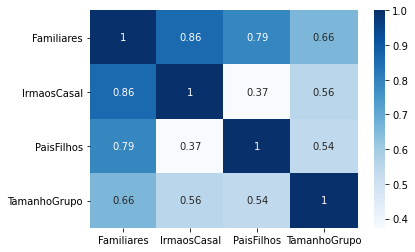

In [68]:
sns.heatmap(df[['Familiares','IrmaosCasal','PaisFilhos','TamanhoGrupo']].corr(), annot=True, cmap='Blues');

In [69]:
df.describe()

,Sobreviveu,Sexo,IrmaosCasal,PaisFilhos,Tarifa,TamanhoGrupo,SobrevivenciaGrupo,Classe_2,Classe_3,PortoEmbarque_Q,PortoEmbarque_S,Titulo_Casada,Titulo_Menino,Titulo_Solteira,ExpectativaDeVida_Morrer,ExpectativaDeVida_Viver,Idade,Familiares
count,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,0.383838,0.355997,0.498854,0.385027,33.295479,0.592055,0.236549,0.211612,0.541635,0.093965,0.699771,0.152024,0.046600,0.203972,0.044309,0.069519,29.689334,0.883881
std,0.486592,0.478997,1.041658,0.865560,51.738879,1.144110,0.421947,0.408607,0.498454,0.291891,0.458533,0.359182,0.210862,0.403103,0.205859,0.254431,13.424715,1.583639
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.463234,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,14.454200,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.448751,0.000000
75%,1.000000,1.000000,1.000000,0.000000,31.275000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,1.000000
max,1.000000,1.000000,8.000000,9.000000,512.329200,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,80.000000,10.000000


In [70]:
df.drop(['IrmaosCasal', 'PaisFilhos', 'Familiares'], axis=1, inplace=True)

In [71]:
df.shape

(1309, 15)

# Exportanto Base de Dados

In [72]:
df.to_parquet(save_file)